Importaciones

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

Leer los datos

In [20]:
# Función para leer datos desde un archivo txt con formato "x y"
def ReadData(filename):
    x_data, y_data = [], []
    with open(filename, "r") as file:
        for line in file:
            x_val, y_val = map(float, line.split())  # Separa valores por espacios
            x_data.append(x_val)
            y_data.append(y_val)
    return np.array(x_data), np.array(y_data)

# Leer datos desde el archivo
x, y = ReadData("Datos_Grupo_3.txt")  # Archivo con valores de x e y en columnas

Apartado a

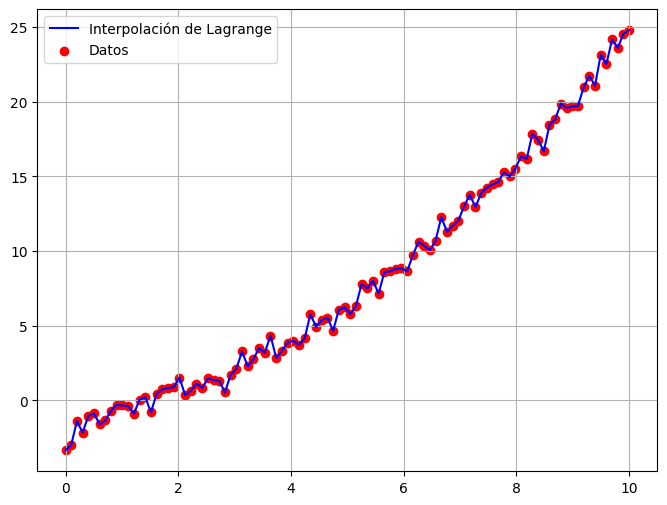

In [21]:
def lagrange_interpolation(x_data, y_data, x_interp):
    def basis(j, x_point):
        term = [(x_point - x_data[m]) / (x_data[j] - x_data[m]) for m in range(len(x_data)) if m != j]
        return np.prod(term, axis=0)
    return sum(y_data[j] * basis(j, x_interp) for j in range(len(x_data)))

x_interp = np.linspace(min(x), max(x), 100)
y_interp = lagrange_interpolation(x, y, x_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_interp, y_interp, label='Interpolación de Lagrange', color='blue')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.grid()
plt.show()

Apartado b

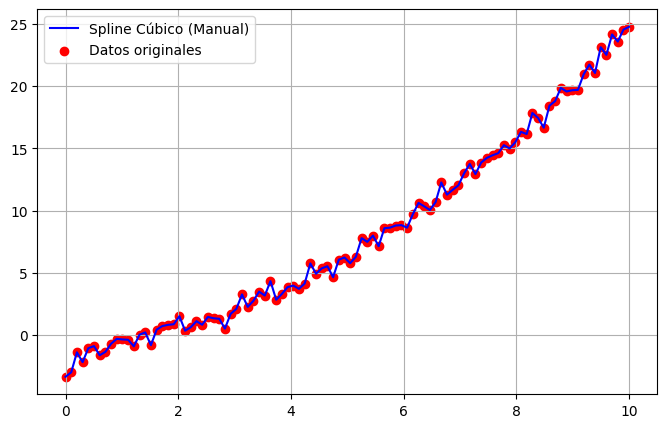

In [22]:
def cubic_spline_manual(x_data, y_data, x_interp):
    n = len(x_data) - 1
    h = np.diff(x_data)  # Diferencias entre puntos
    b = np.diff(y_data) / h  # Pendientes entre puntos

    # Construcción del sistema tridiagonal
    A = np.zeros((n+1, n+1))
    B = np.zeros(n+1)

    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * (b[i] - b[i-1])

    # Resolver el sistema para obtener c
    c = np.linalg.solve(A, B)

    # Calcular coeficientes a, b, d
    a = y_data[:-1]
    d = np.diff(c) / (3 * h)
    b = b - h * (2*c[:-1] + c[1:]) / 3

    # Evaluación del spline en los puntos de interpolación
    y_interp = np.zeros_like(x_interp)
    for i in range(n):
        idx = (x_interp >= x_data[i]) & (x_interp <= x_data[i+1])
        dx = x_interp[idx] - x_data[i]
        y_interp[idx] = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

    return y_interp

x_interp = np.linspace(min(x), max(x), 100)

#  Interpolación cúbica manual
y_spline = cubic_spline_manual(x, y, x_interp)

#  Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(x_interp, y_spline, label='Spline Cúbico (Manual)', color='blue')
plt.scatter(x, y, color='red', label='Datos originales')
plt.legend()
plt.grid()
plt.show()


Apartado c

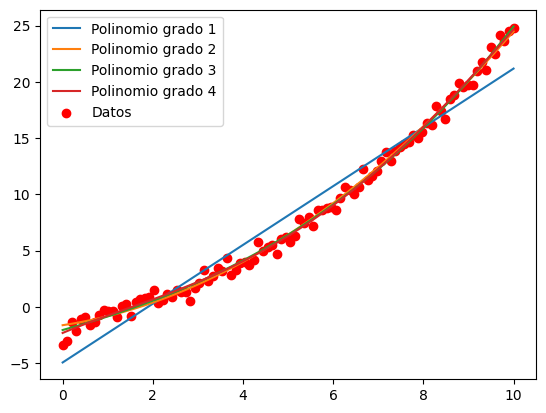

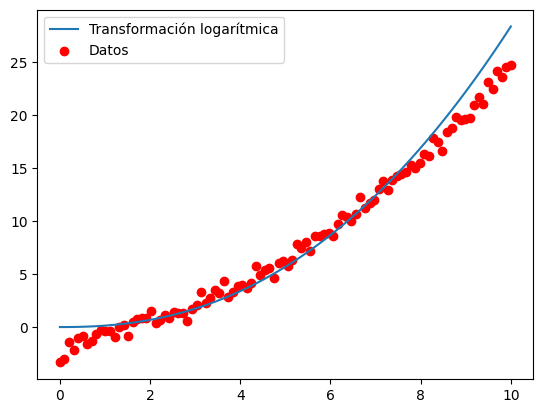

In [23]:
x_interp = np.linspace(min(x), max(x), 100)

# Ajuste polinomial de grado 1 a 4
for degree in range(1, 5):
    coeffs = np.polyfit(x, y, degree)
    poly_func = np.poly1d(coeffs)
    y_fit = poly_func(x_interp)
    plt.plot(x_interp, y_fit, label=f'Polinomio grado {degree}')

plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()

# --------------------------
# TRANSFORMACIÓN LOGARÍTMICA
# --------------------------
# Filtrar valores positivos
mask = (x > 0) & (y > 0)  # Evita logaritmos de números no válidos
x_log = np.log(x[mask])
y_log = np.log(y[mask])

# Verificar que la transformación no generó NaN o Inf
if np.any(np.isnan(x_log)) or np.any(np.isnan(y_log)):
    raise ValueError("Se encontraron valores NaN después de la transformación logarítmica.")

# Ajuste lineal en escala log-log
coeffs_log = np.polyfit(x_log, y_log, 1)
y_transformed = np.exp(coeffs_log[1]) * x_interp ** coeffs_log[0]

plt.plot(x_interp, y_transformed, label='Transformación logarítmica')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()


Apartado d

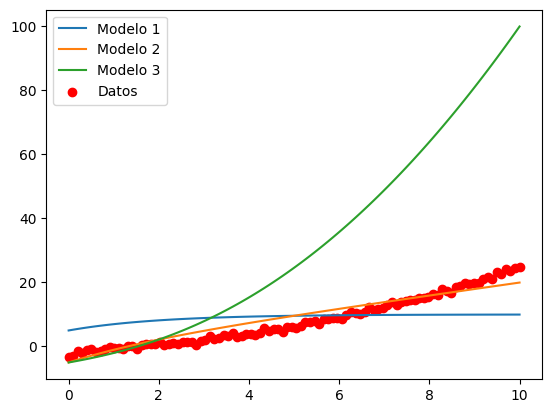

In [24]:
def model_1(x, a0, a1, a2):
    return a0 - a1 * np.exp(-a2 * x)

def model_2(x, a0, a1, a2):
    return a0 * x - a1 * np.exp(-a2 * x)

def model_3(x, a0, a1, a2):
    return a0 * x**2 - a1 * np.exp(-a2 * x)

plt.plot(x_interp, model_1(x_interp, 10, 5, 0.5), label='Modelo 1')
plt.plot(x_interp, model_2(x_interp, 2, 5, 0.5), label='Modelo 2')
plt.plot(x_interp, model_3(x_interp, 1, 5, 0.5), label='Modelo 3')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()